In [83]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [84]:
# Import all necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore # Helps me normalize the numerical columns
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns

In [85]:
tier_df_1= pd.read_csv("CN_Tie_model.csv",encoding = 'unicode_escape')

In [86]:
tier_df_1.head().transpose()

,0,1,2,3,4
Date,00:00.0,00:00.0,00:00.0,00:00.0,00:00.0
SubDivision,YALE,YALE,YALE,YALE,YALE
GangId,W53T0100,W53T0100,W53T0100,W53T02TE,W53T02TJ
OrderNumber,707565622,707565622,707565622,707565293,707565293
OperationNumber,410,410,410,410,710
TrackId,1,1,1,1,1
MegaWorkBlock,No,No,No,No,No
ShadowWorkBlock,No,No,No,No,No
SplitWorkBlock,No,No,No,No,No
TieType,WOOD,WOOD,WOOD,WOOD,WOOD


In [87]:
tier_df_1.iloc[3:4,:].transpose()

,3
Date,00:00.0
SubDivision,YALE
GangId,W53T02TE
OrderNumber,707565293
OperationNumber,410
TrackId,1
MegaWorkBlock,No
ShadowWorkBlock,No
SplitWorkBlock,No
TieType,WOOD


In [88]:
tier_df=tier_df_1

In [89]:
tier_df.columns.sort_values()

Index(['ActualEndTime', 'ActualStartTime', 'AnchorPattern', 'ConfidenceLevel',
       'Date', 'ExpectedOutput', 'FastenerTypeTie', 'GangId', 'MegaWorkBlock',
       'NumberofTampers', 'OperationNumber', 'OrderNumber', 'PadInsulatorType',
       'ShadowWorkBlock', 'SpikePattern', 'SplitWorkBlock', 'SubDivision',
       'TieDensity', 'TieNumberType', 'TieType', 'TrackId',
       'TravelTimeDuringBlocks', 'Version', 'WBMileFrom', 'WBMileTo',
       'workBlockPlannedMinutes'],
      dtype='object')

In [90]:
#dropping Actual Start and End Time, as they are actual values. Not used by Modeltier_
tier_df=tier_df.drop(columns=['ActualEndTime', 'ActualStartTime'])

In [91]:
#dropping date as its not needed by Model
tier_df=tier_df.drop(columns=['Date'])

In [92]:
#dropping Order Number 
tier_df=tier_df.drop(columns=['OrderNumber'])

In [93]:
# dropping TravelTimeDuringBlocks , version as its not needed for Ties
tier_df=tier_df.drop(columns=['TravelTimeDuringBlocks', 'Version'])

In [94]:
for col in tier_df.columns:
    print (col)
    print ((tier_df[col].unique()))
    print(tier_df[col].isnull().any())

SubDivision
['YALE' 'SUPERIOR' 'SKEENA' 'CLEARWATER' 'ROSETOWN' 'BULKLEY' 'ROBSON'
 'EDSON' 'SQUAMISH' 'WAINWRIGHT' 'NEENAH' 'RIVERS' 'ASHCROFT' 'FRASER'
 'YORKTON' 'SLAVE LAKE' 'ALBREDA' 'GLADSTONE' 'OYEN' 'OKANAGAN'
 'THREE HILLS' 'WAUKESHA' 'LUMBY' 'VEGREVILLE' 'CHETWYND' 'LILLOOET'
 'PRINCE GEORGE' 'MACKENZIE' 'LETELLIER' 'DRUMHELLER' 'WATROUS' 'TOGO'
 'FORT ST JOHN' 'PEACE RIVER' 'WESTLOCK' 'KASHABOWIE' 'FORT NELSON'
 'FORT FRANCES' 'MEANDER RIVER' 'QUAPPELLE' 'GRANDE CACHE' 'CRAIK'
 'CROMER' 'TURNBERRY' 'ABERDEEN' 'TELKWA' 'NECHAKO' 'MANNING' 'SPRAGUE'
 'DAWSON CREEK' 'ASSINIBOINE' 'LEITHTON' 'SANGUDO' 'PREECEVILLE'
 'FOOTHILLS' 'GRANDE PRAIRIE' 'MOUNTAIN PARK' 'TETE JAUNE' 'BLACKFOOT'
 'MARGO' 'ST-BRIEUX' 'RAINY' 'CARBERRY' 'KITIMAT' 'LAMPMAN'
 'CENTRAL BUTTE' 'STUART' 'TISDALE']
False
GangId
['W53T0100' 'W53T02TE' 'W53T02TJ' 'W53T01TE' 'S71T05TD' 'W50P0T03'
 'W54T0200' 'W53T06TE' 'W53T06TK' 'W44T01TB' 'W53T01TA' 'W54T04TD'
 'W51T01TL' 'W54T02TC' 'W54T02TB' 'W54T02TD' 'W53T02TA'

In [95]:
# FastenerTypeTie has only two kinds of values. nan and "CLIP_RAIL'". nan can be changed to "None"
# TieNumberType has only two kinds of values. nan and "Tie Type 1". nan can be changed to "None"        
# NumberofTampers has a single value 0. So, can be removed
# PadInsulatorType is fully nan. So can be removed.
# MegaWorkBlock, ShadowWorkBlock and SplitWorkBlock have single value as "No". So, can be removed

In [96]:
tier_df.dtypes

SubDivision                 object
GangId                      object
OperationNumber              int64
TrackId                     object
MegaWorkBlock               object
ShadowWorkBlock             object
SplitWorkBlock              object
TieType                     object
WBMileFrom                 float64
WBMileTo                   float64
AnchorPattern               object
SpikePattern                object
FastenerTypeTie             object
TieNumberType               object
NumberofTampers              int64
PadInsulatorType           float64
ExpectedOutput             float64
ConfidenceLevel            float64
workBlockPlannedMinutes      int64
TieDensity                 float64
dtype: object

In [97]:
tier_df=tier_df.drop(columns=['NumberofTampers', 'PadInsulatorType'])

In [98]:
tier_df['Miles'] = abs(tier_df['WBMileFrom'] - tier_df['WBMileTo'])

In [99]:
tier_df=tier_df.drop(columns=['MegaWorkBlock', 'ShadowWorkBlock', 'SplitWorkBlock'])

In [100]:
#drop WBMileFrom and WBMileTo
tier_df=tier_df.drop(columns=['WBMileFrom', 'WBMileTo'])

In [101]:
# Convert NaN to none for FastenerTypeTie
tier_df['FastenerTypeTie'].fillna('none', inplace=True)

In [102]:
tier_df['TieNumberType'].fillna('none', inplace=True)

In [103]:
tier_df.dtypes

SubDivision                 object
GangId                      object
OperationNumber              int64
TrackId                     object
TieType                     object
AnchorPattern               object
SpikePattern                object
FastenerTypeTie             object
TieNumberType               object
ExpectedOutput             float64
ConfidenceLevel            float64
workBlockPlannedMinutes      int64
TieDensity                 float64
Miles                      float64
dtype: object

In [104]:
tier_df['SubDivision'] = tier_df['SubDivision'].astype('category')
tier_df['GangId'] = tier_df['GangId'].astype('category')
tier_df['TrackId'] = tier_df['TrackId'].astype('category')         
tier_df['TieType'] = tier_df['TieType'].astype('category')
tier_df['AnchorPattern'] = tier_df['AnchorPattern'].astype('category')
tier_df['SpikePattern'] = tier_df['SpikePattern'].astype('category')
tier_df['FastenerTypeTie'] = tier_df['FastenerTypeTie'].astype('category')
tier_df['TieNumberType'] = tier_df['TieNumberType'].astype('category')
tier_df['OperationNumber'] = tier_df['OperationNumber'].astype('category')


In [105]:
tier_df.dtypes

SubDivision                category
GangId                     category
OperationNumber            category
TrackId                    category
TieType                    category
AnchorPattern              category
SpikePattern               category
FastenerTypeTie            category
TieNumberType              category
ExpectedOutput              float64
ConfidenceLevel             float64
workBlockPlannedMinutes       int64
TieDensity                  float64
Miles                       float64
dtype: object

In [106]:
#Label Encode GangId categorical column
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
tier_df['GangId'] = encode.fit_transform(tier_df['GangId'])
keys = encode.classes_
values = encode.transform(encode.classes_)
GangId_dictionary = dict(zip(keys, values))
print(GangId_dictionary)

{'S70P0S03': 0, 'S70P0T01': 1, 'S70P0T04': 2, 'S70P0T05': 3, 'S70P0X05': 4, 'S71T01S1': 5, 'S71T04TA': 6, 'S71T04TG': 7, 'S71T05TD': 8, 'S71T05TE': 9, 'S71T05TK': 10, 'S71T06S1': 11, 'S72T01TC': 12, 'S72T01TD': 13, 'S72T01TJ': 14, 'S72T03S1': 15, 'S72T03TA': 16, 'S72T03TJ': 17, 'S72T03TL': 18, 'S72T03WA': 19, 'S80P0T03': 20, 'S81T07S2': 21, 'W40P0R01': 22, 'W40P0R02': 23, 'W40P0S01': 24, 'W40P0S02': 25, 'W40P0S03': 26, 'W40P0S04': 27, 'W40P0S05': 28, 'W40P0T01': 29, 'W40P0T02': 30, 'W40P0T07': 31, 'W40P0T08': 32, 'W40P0W02': 33, 'W40P0W10': 34, 'W40P0W11': 35, 'W40P0W17': 36, 'W40P0W18': 37, 'W40P0W19': 38, 'W41T0100': 39, 'W41T01TB': 40, 'W41T01TD': 41, 'W41T01TE': 42, 'W41T01TF': 43, 'W41T02TA': 44, 'W41T02TF': 45, 'W41T04TB': 46, 'W41T04TD': 47, 'W41T04TF': 48, 'W41T04TG': 49, 'W41T05TE': 50, 'W41T05TF': 51, 'W42T01TC': 52, 'W42T01TD': 53, 'W42T0400': 54, 'W42T04TA': 55, 'W42T04TB': 56, 'W42T04TC': 57, 'W42T04TD': 58, 'W42T04TF': 59, 'W42T04WB': 60, 'W43T0300': 61, 'W43T03TB': 62, '

In [107]:
tier_df['SubDivision']=encode.fit_transform(tier_df['SubDivision'])
keys = encode.classes_
values = encode.transform(encode.classes_)
SubDivision_dictionary = dict(zip(keys, values))
print(SubDivision_dictionary)

{'ABERDEEN': 0, 'ALBREDA': 1, 'ASHCROFT': 2, 'ASSINIBOINE': 3, 'BLACKFOOT': 4, 'BULKLEY': 5, 'CARBERRY': 6, 'CENTRAL BUTTE': 7, 'CHETWYND': 8, 'CLEARWATER': 9, 'CRAIK': 10, 'CROMER': 11, 'DAWSON CREEK': 12, 'DRUMHELLER': 13, 'EDSON': 14, 'FOOTHILLS': 15, 'FORT FRANCES': 16, 'FORT NELSON': 17, 'FORT ST JOHN': 18, 'FRASER': 19, 'GLADSTONE': 20, 'GRANDE CACHE': 21, 'GRANDE PRAIRIE': 22, 'KASHABOWIE': 23, 'KITIMAT': 24, 'LAMPMAN': 25, 'LEITHTON': 26, 'LETELLIER': 27, 'LILLOOET': 28, 'LUMBY': 29, 'MACKENZIE': 30, 'MANNING': 31, 'MARGO': 32, 'MEANDER RIVER': 33, 'MOUNTAIN PARK': 34, 'NECHAKO': 35, 'NEENAH': 36, 'OKANAGAN': 37, 'OYEN': 38, 'PEACE RIVER': 39, 'PREECEVILLE': 40, 'PRINCE GEORGE': 41, 'QUAPPELLE': 42, 'RAINY': 43, 'RIVERS': 44, 'ROBSON': 45, 'ROSETOWN': 46, 'SANGUDO': 47, 'SKEENA': 48, 'SLAVE LAKE': 49, 'SPRAGUE': 50, 'SQUAMISH': 51, 'ST-BRIEUX': 52, 'STUART': 53, 'SUPERIOR': 54, 'TELKWA': 55, 'TETE JAUNE': 56, 'THREE HILLS': 57, 'TISDALE': 58, 'TOGO': 59, 'TURNBERRY': 60, 'VEGRE

In [108]:
tier_df['TrackId']=encode.fit_transform(tier_df['TrackId'])
keys = encode.classes_
values = encode.transform(encode.classes_)
TrackId_dictionary = dict(zip(keys, values))
print(TrackId_dictionary)

{'01S': 0, '03S': 1, '04S': 2, '06S': 3, '08S': 4, '1': 5, '2': 6, '3': 7, '9999': 8, '99S': 9, 'AA09': 10, 'AA10': 11, 'AA11': 12, 'AA14': 13, 'AC30': 14, 'AP1': 15, 'AR53': 16, 'AR54': 17, 'AT33': 18, 'AT44': 19, 'BE09': 20, 'BF11': 21, 'BF41': 22, 'BP01': 23, 'BP1': 24, 'C30': 25, 'C31': 26, 'C35': 27, 'C79': 28, 'CE01': 29, 'CF30': 30, 'CF45': 31, 'CF50': 32, 'CF51': 33, 'CF54': 34, 'CF55': 35, 'CF56': 36, 'CF61': 37, 'CF67': 38, 'CG12': 39, 'CH03': 40, 'DD70': 41, 'DF17': 42, 'DF18': 43, 'DF19': 44, 'DF21': 45, 'DSD7': 46, 'E03': 47, 'EF08': 48, 'EF11': 49, 'EF12': 50, 'EL01': 51, 'EX11': 52, 'F100': 53, 'F200': 54, 'FB50': 55, 'FB55': 56, 'FC11': 57, 'FF11': 58, 'FF72': 59, 'FS06': 60, 'FS08': 61, 'FS34': 62, 'FT23': 63, 'FV10': 64, 'G122': 65, 'GA10': 66, 'GB01': 67, 'GB45': 68, 'GU01': 69, 'KC10': 70, 'KC14': 71, 'KC16': 72, 'KE01': 73, 'KE03': 74, 'KF01': 75, 'KF23': 76, 'KR59': 77, 'KR63': 78, 'L1': 79, 'L2': 80, 'L3': 81, 'L4': 82, 'L5': 83, 'LD00': 84, 'LD14': 85, 'LD7': 86

In [109]:
tier_df['AnchorPattern']=encode.fit_transform(tier_df['AnchorPattern'])
keys = encode.classes_
values = encode.transform(encode.classes_)
AnchorPattern_dictionary = dict(zip(keys, values))
print(AnchorPattern_dictionary)

{'Pattern 10': 0, 'Pattern 6': 1, 'Pattern 8': 2}


In [110]:
tier_df['SpikePattern']=encode.fit_transform(tier_df['SpikePattern'])
keys = encode.classes_
values = encode.transform(encode.classes_)
SpikePattern_dictionary = dict(zip(keys, values))
print(SpikePattern_dictionary)

{'A': 0, 'B': 1, 'D': 2}


In [111]:
tier_df['FastenerTypeTie']=encode.fit_transform(tier_df['FastenerTypeTie'])
keys = encode.classes_
values = encode.transform(encode.classes_)
FastenerTypeTie_dictionary = dict(zip(keys, values))
print(FastenerTypeTie_dictionary)

{'CLIP_RAIL': 0, 'none': 1}


In [112]:
tier_df['TieNumberType']=encode.fit_transform(tier_df['TieNumberType'])
keys = encode.classes_
values = encode.transform(encode.classes_)
TieNumberType_dictionary = dict(zip(keys, values))
print(TieNumberType_dictionary)

{'Tie Type 1': 0, 'none': 1}


In [113]:
#Adding new type
TieNumberType_dictionary['Tie Type 2']=2

In [114]:
print(TieNumberType_dictionary)

{'Tie Type 1': 0, 'none': 1, 'Tie Type 2': 2}


In [115]:
tier_df['OperationNumber']=encode.fit_transform(tier_df['OperationNumber'])
keys = encode.classes_
values = encode.transform(encode.classes_)
OperationNumber_dictionary = dict(zip(keys, values))
print(OperationNumber_dictionary)

{310: 0, 410: 1, 510: 2, 610: 3, 710: 4}


In [116]:
tier_df.head()

,SubDivision,GangId,OperationNumber,TrackId,TieType,AnchorPattern,SpikePattern,FastenerTypeTie,TieNumberType,ExpectedOutput,ConfidenceLevel,workBlockPlannedMinutes,TieDensity,Miles
0,66,127,1,5,WOOD,0,1,1,1,22.570000,0.7,240,255.555115,0.090000
1,66,127,1,5,WOOD,0,1,1,1,34.904999,0.7,240,388.892364,0.089999
2,66,127,1,5,WOOD,0,1,1,1,29.770000,0.7,240,333.332764,0.090000
3,66,134,1,5,WOOD,0,1,1,1,237.065002,0.7,0,3328.585938,0.070000
4,66,136,4,5,WOOD,0,1,1,1,927.085022,0.7,0,5312.879883,0.310001


In [117]:
tier_df['TieType']=encode.fit_transform(tier_df['TieType'])
keys = encode.classes_
values = encode.transform(encode.classes_)
TieType_dictionary = dict(zip(keys, values))
print(TieType_dictionary)

{'CONCRETE': 0, 'WOOD': 1}


In [118]:
tier_df.head()

,SubDivision,GangId,OperationNumber,TrackId,TieType,AnchorPattern,SpikePattern,FastenerTypeTie,TieNumberType,ExpectedOutput,ConfidenceLevel,workBlockPlannedMinutes,TieDensity,Miles
0,66,127,1,5,1,0,1,1,1,22.570000,0.7,240,255.555115,0.090000
1,66,127,1,5,1,0,1,1,1,34.904999,0.7,240,388.892364,0.089999
2,66,127,1,5,1,0,1,1,1,29.770000,0.7,240,333.332764,0.090000
3,66,134,1,5,1,0,1,1,1,237.065002,0.7,0,3328.585938,0.070000
4,66,136,4,5,1,0,1,1,1,927.085022,0.7,0,5312.879883,0.310001


In [119]:
tier_df.count()

SubDivision                4760
GangId                     4760
OperationNumber            4760
TrackId                    4760
TieType                    4760
AnchorPattern              4760
SpikePattern               4760
FastenerTypeTie            4760
TieNumberType              4760
ExpectedOutput             4760
ConfidenceLevel            4760
workBlockPlannedMinutes    4760
TieDensity                 4760
Miles                      4760
dtype: int64

In [120]:
tier_df.dtypes

SubDivision                  int32
GangId                       int32
OperationNumber              int64
TrackId                      int32
TieType                      int32
AnchorPattern                int32
SpikePattern                 int32
FastenerTypeTie              int32
TieNumberType                int32
ExpectedOutput             float64
ConfidenceLevel            float64
workBlockPlannedMinutes      int64
TieDensity                 float64
Miles                      float64
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


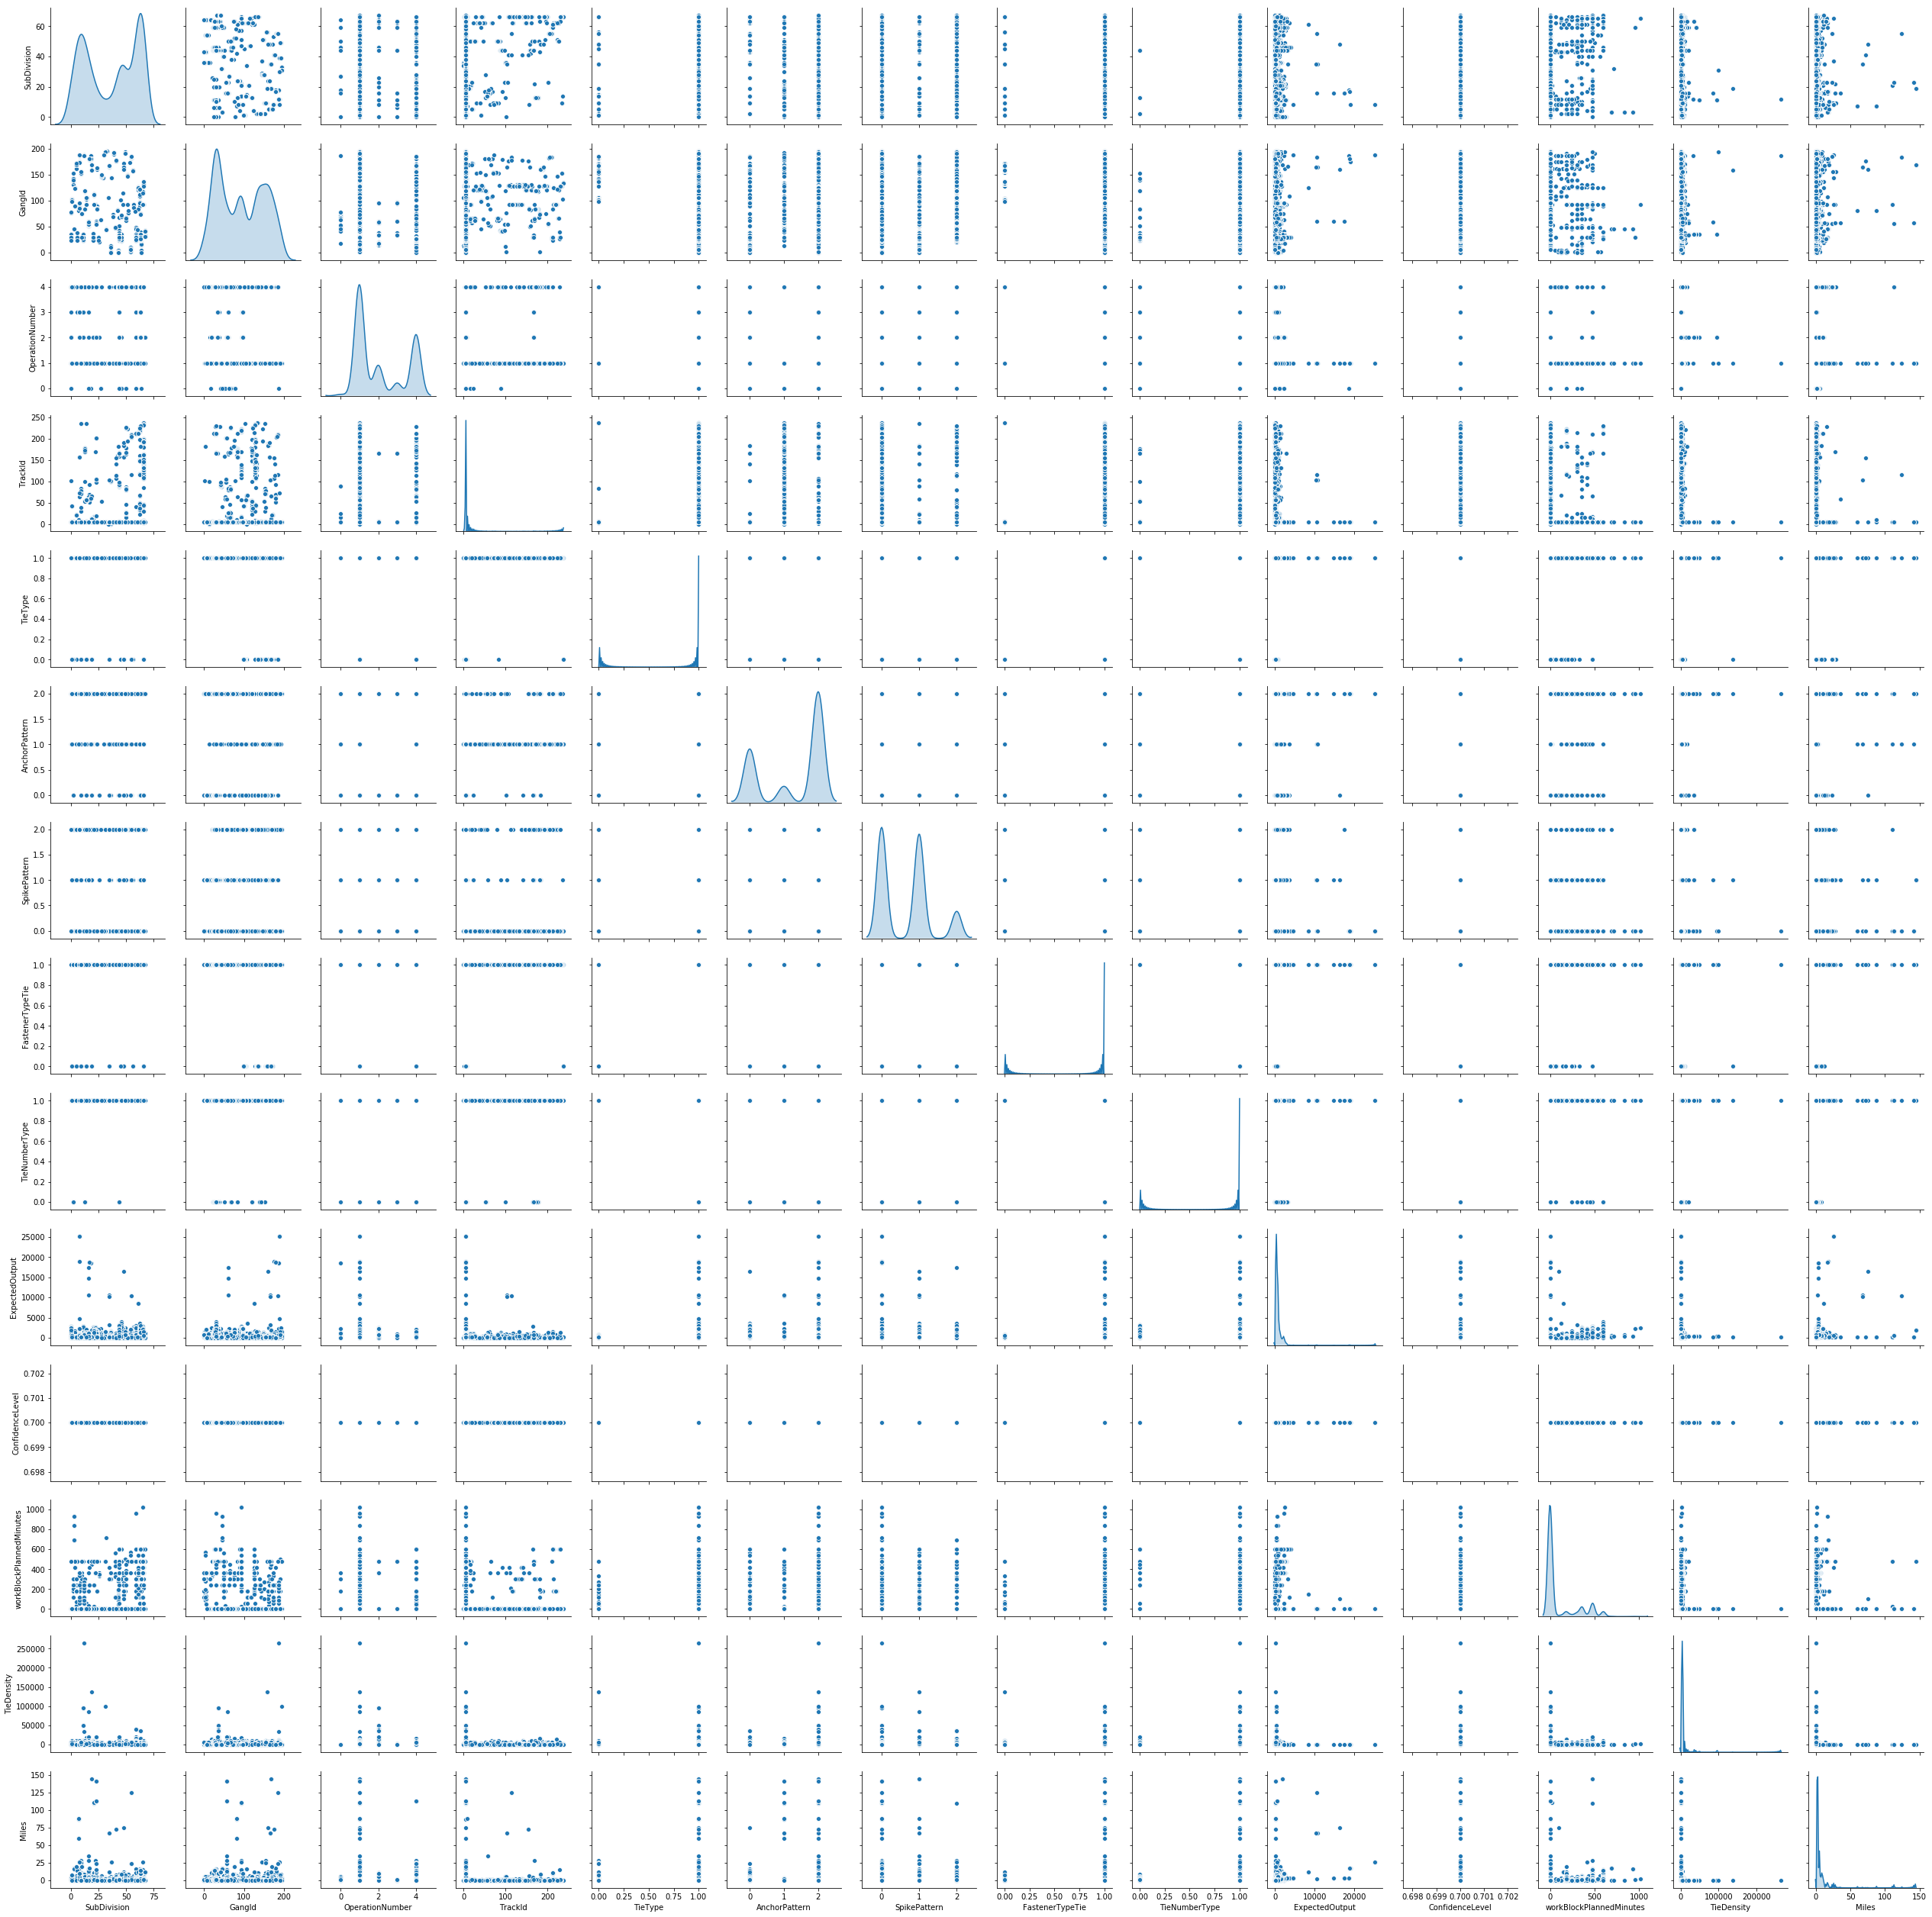

In [121]:
sns.pairplot(tier_df, diag_kind='kde')

In [122]:
#drop confidence level as that is accuracy
tier_df=tier_df.drop(columns=['ConfidenceLevel'])


In [123]:
corr=tier_df.corr()

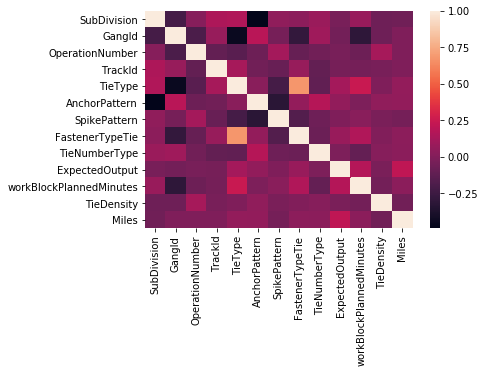

In [124]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [125]:
X=tier_df.drop(columns=['ExpectedOutput'])

In [126]:
Y=tier_df['ExpectedOutput']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.20 , random_state=2)

In [129]:
from sklearn.ensemble import RandomForestRegressor
#DecisionTreeClassifier is the corresponding Classifier
#DTregressor = DecisionTreeRegressor (max_depth=3, random_state = 0)
Model = RandomForestRegressor(max_depth=10, random_state = 2)
# Your code here
#DTregressor.fit (# Your code here, # Your code here)
Model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [130]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

Y_pred = Model.predict(X_test)

In [131]:
Model.score(X_test, Y_test)

0.9841947705687143

In [132]:
Model.feature_importances_

array([2.43927441e-02, 1.49481961e-02, 2.18528011e-02, 8.95774201e-03,
       5.02642685e-03, 1.89797541e-03, 2.86233213e-03, 6.53061154e-05,
       1.17561006e-04, 1.61341313e-02, 6.65772892e-01, 2.37971892e-01])

In [133]:
#print(lambda x: round(x, 4), Model.feature_importances_), X_train.columns)

In [134]:
Y_pred

array([4.19812000e+02, 4.55490289e+01, 2.64713025e+03, 8.57400426e+02,
       1.13368168e+02, 3.10089878e+02, 2.94871519e+02, 2.84638038e+02,
       1.69184297e+02, 2.19160582e+02, 2.19555001e+01, 1.94965312e+02,
       2.19915758e+03, 1.59755382e+02, 8.57400426e+02, 2.90989840e+02,
       5.26539465e+01, 7.22408635e+02, 2.32945935e+02, 5.74536977e+02,
       4.25982164e+02, 3.40054924e+02, 3.81903998e+02, 1.30069755e+01,
       6.29463983e+02, 7.04839519e+02, 1.30069755e+01, 1.38253811e+03,
       2.95872031e+02, 2.36796742e+01, 9.16686120e+01, 2.15363632e+03,
       7.29215638e+02, 2.12919266e+02, 1.55523466e+03, 4.03908237e+02,
       2.36324611e+02, 1.30069755e+01, 8.58129732e+02, 2.94871519e+02,
       1.65664509e+02, 4.80559219e+02, 4.77685198e+02, 1.52157426e+02,
       7.47790970e+02, 4.27242047e+02, 2.66956558e+01, 2.87879357e+02,
       5.02034440e+02, 2.96370674e+02, 1.29310656e+02, 2.66879665e+02,
       3.90362963e+02, 2.48070304e+02, 1.87644018e+02, 1.49692579e+01,
      

In [135]:
print((Model.feature_importances_)*100)

[2.43927441e+00 1.49481961e+00 2.18528011e+00 8.95774201e-01
 5.02642685e-01 1.89797541e-01 2.86233213e-01 6.53061154e-03
 1.17561006e-02 1.61341313e+00 6.65772892e+01 2.37971892e+01]


In [136]:
X_train.columns

Index(['SubDivision', 'GangId', 'OperationNumber', 'TrackId', 'TieType',
       'AnchorPattern', 'SpikePattern', 'FastenerTypeTie', 'TieNumberType',
       'workBlockPlannedMinutes', 'TieDensity', 'Miles'],
      dtype='object')

In [137]:
New_Out= X_test

In [138]:
New_Out['Prediction']=Y_pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
New_Out['Y_test'] = Y_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
New_Out.head(30)

,SubDivision,GangId,OperationNumber,TrackId,TieType,AnchorPattern,SpikePattern,FastenerTypeTie,TieNumberType,workBlockPlannedMinutes,TieDensity,Miles,Prediction,Y_test
1346,17,180,1,5,1,2,0,1,1,0,2.439024,17.630005,419.812000,518.215027
1080,64,19,2,5,1,0,1,1,1,0,6.896556,2.029999,45.549029,30.969999
765,57,92,1,5,1,2,0,1,1,480,1026.391846,3.410004,2647.130250,2510.639893
4416,8,96,2,5,1,2,0,1,1,0,683.761780,4.679993,857.400426,636.385010
4231,61,83,1,213,1,2,2,1,1,0,535.716614,0.279999,113.368168,146.794998
1634,19,158,1,5,0,2,1,0,1,0,2583.356445,0.119999,310.089878,310.000000
1581,19,158,1,5,0,2,1,0,1,0,2627.258057,0.110001,294.871519,288.864990
4016,63,36,2,5,1,0,1,1,1,480,1071.433228,0.279999,284.638038,284.804993
2917,59,35,3,5,1,2,0,1,1,0,0.000000,0.000000,169.184297,171.170593
4749,14,105,1,56,1,2,0,1,1,0,2511.213379,0.089996,219.160582,219.774994


In [141]:
import pickle

In [142]:
from numpy import random

In [143]:
random.get_state

<function RandomState.get_state>

In [144]:
#pickle.dump(Model, open('finalized_model_tier_p3.sav', 'wb'))
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(Model, 'finalized_model_tier_p3.pkl') 

['finalized_model_tier_p3.pkl']

In [167]:
import csv
w = csv.writer(open("..\..\..\Dictionary\RandomForest\Version1\GangId_dictionary.csv", "w", newline=''))
for key, val in GangId_dictionary.items():
    w.writerow([key, val])

In [168]:
w = csv.writer(open("..\..\..\Dictionary\RandomForest\Version1\SubDivision_dictionary.csv", "w", newline=''))
for key, val in SubDivision_dictionary.items():
    w.writerow([key, val])

In [169]:
w = csv.writer(open("..\..\..\Dictionary\RandomForest\Version1\TrackId_dictionary.csv", "w", newline=''))
for key, val in TrackId_dictionary.items():
    w.writerow([key, val])

In [170]:
w = csv.writer(open("..\..\..\Dictionary\RandomForest\Version1\AnchorPattern_dictionary.csv", "w", newline=''))
for key, val in AnchorPattern_dictionary.items():
    w.writerow([key, val])

In [171]:
w = csv.writer(open("..\..\..\\Dictionary\RandomForest\Version1\SpikePattern_dictionary.csv", "w", newline=''))
for key, val in SpikePattern_dictionary.items():
    w.writerow([key, val])

In [172]:
w = csv.writer(open("..\..\..\Dictionary\RandomForest\Version1\FastenerTypeTie_dictionary.csv", "w", newline=''))
for key, val in FastenerTypeTie_dictionary.items():
    w.writerow([key, val])

In [173]:
w = csv.writer(open("..\..\..\Dictionary\RandomForest\Version1\TieNumberType_dictionary.csv", "w", newline=''))
for key, val in TieNumberType_dictionary.items():
    w.writerow([key, val])

In [174]:
w = csv.writer(open("..\..\..\Dictionary\RandomForest\Version1\TieType_dictionary.csv", "w", newline=''))
for key, val in TieType_dictionary.items():
    w.writerow([key, val])

In [175]:
w = csv.writer(open("..\..\..\Dictionary\RandomForest\Version1\OperationNumber_dictionary.csv", "w", newline=''))
for key, val in OperationNumber_dictionary.items():
    w.writerow([key, val])

In [176]:
X_train.columns

Index(['SubDivision', 'GangId', 'OperationNumber', 'TrackId', 'TieType',
       'AnchorPattern', 'SpikePattern', 'FastenerTypeTie', 'TieNumberType',
       'workBlockPlannedMinutes', 'TieDensity', 'Miles'],
      dtype='object')

In [177]:
Y_pred

array([4.19812000e+02, 4.55490289e+01, 2.64713025e+03, 8.57400426e+02,
       1.13368168e+02, 3.10089878e+02, 2.94871519e+02, 2.84638038e+02,
       1.69184297e+02, 2.19160582e+02, 2.19555001e+01, 1.94965312e+02,
       2.19915758e+03, 1.59755382e+02, 8.57400426e+02, 2.90989840e+02,
       5.26539465e+01, 7.22408635e+02, 2.32945935e+02, 5.74536977e+02,
       4.25982164e+02, 3.40054924e+02, 3.81903998e+02, 1.30069755e+01,
       6.29463983e+02, 7.04839519e+02, 1.30069755e+01, 1.38253811e+03,
       2.95872031e+02, 2.36796742e+01, 9.16686120e+01, 2.15363632e+03,
       7.29215638e+02, 2.12919266e+02, 1.55523466e+03, 4.03908237e+02,
       2.36324611e+02, 1.30069755e+01, 8.58129732e+02, 2.94871519e+02,
       1.65664509e+02, 4.80559219e+02, 4.77685198e+02, 1.52157426e+02,
       7.47790970e+02, 4.27242047e+02, 2.66956558e+01, 2.87879357e+02,
       5.02034440e+02, 2.96370674e+02, 1.29310656e+02, 2.66879665e+02,
       3.90362963e+02, 2.48070304e+02, 1.87644018e+02, 1.49692579e+01,
      

In [178]:
New_df1=X_train.head(1)

In [179]:
#New_df['TieDensity']=5280

In [180]:
#New_df.head(1)

In [181]:
#New_df['Miles']=0.5

In [182]:
#New_df['SpikePattern']=0

In [183]:
print(New_df1)

     SubDivision  GangId  OperationNumber  TrackId  TieType  AnchorPattern  \
238           17      14                0        0        1              0   

     SpikePattern  FastenerTypeTie  TieNumberType  workBlockPlannedMinutes  \
238             0                1              0                        0   

     TieDensity  Miles  
238      5280.0    0.5  


In [184]:
New_df1.iloc[0:1,:]=(17,14,0,0,1,0,0,1,0,0,5280.000000,0.5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [185]:
New_df1.head().transpose()

,238
SubDivision,17.0
GangId,14.0
OperationNumber,0.0
TrackId,0.0
TieType,1.0
AnchorPattern,0.0
SpikePattern,0.0
FastenerTypeTie,1.0
TieNumberType,0.0
workBlockPlannedMinutes,0.0


In [186]:
y_actual = Model.predict(New_df1)

In [187]:
y_actual

array([747.79097011])

In [188]:
pd.DataFrame

pandas.core.frame.DataFrame

In [189]:
#w = csv.reader(open("..\..\..\Dictionary\RandomForest\Version1\TieType_dictionary.csv", "w", newline=''))

In [190]:
#with open('..\..\..\Dictionary\RandomForest\Version1\TieType_dictionary.csv', mode='r') as infile:
 #   reader = csv.reader(infile)
  #  mydict = {rows[0]:rows[1] for rows in reader}

In [191]:
#mydict

In [192]:
#import csv
   
#with open('..\..\..\Dictionary\RandomForest\Version1\GangId_dictionary.csv', mode='r') as infile:
 #   reader = csv.reader(infile)
  #  mydict = {rows[0]:rows[1] for rows in reader}

In [193]:
#mydict